<a href="https://colab.research.google.com/github/wenxueliu/tech_map/blob/master/DI_engine_Quick_Start_with_CartPole_v1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INSTALLATION GUIDE**

## Prerequisites

Operation system version: Linux, macOS, Windows

Python version: 3.6-3.8

>### *Note:*
>
>If there is a GPU in your setting, you can refer to [Nvidia CUDA Toolkit Installation](https://developer.nvidia.com/cuda-downloads/).
>
>After CUDA being installed, you will get a correct Nvidia CUDA version of Pytorch automaticly when installing DI-engine.
>
>If you want to install Pytorch manually, you can refer to [PyTorch Installation](https://pytorch.org/get-started/locally/).
>
>If your OS is Windows, please do confirm that SWIG is installed and available through the OS environment variable PATH, you can refer to [SWIG installation](https://www.swig.org/download.html).






## Stable Release Version

You can simply install stable release DI-engine with the following command:

In [1]:
# Current stable release of DI-engine
!pip install --upgrade pip
!pip install git+https://github.com/opendilab/DI-engine.git@main#egg=DI-engine
!pip install pyecharts

  Cloning https://github.com/opendilab/DI-engine.git (to revision main) to /tmp/pip-install-znxm94ne/di-engine_10d5f8785c4e4f69a83db1006e4c809d
  Running command git clone --filter=blob:none --quiet https://github.com/opendilab/DI-engine.git /tmp/pip-install-znxm94ne/di-engine_10d5f8785c4e4f69a83db1006e4c809d
  Resolved https://github.com/opendilab/DI-engine.git to commit d919fa5f5da1ceb3efb187dc1d1f28f0be5b616d
  Preparing metadata (setup.py) ... done


>### *Tips:*
>
> If you need to upgrade pip, you can use the following commands:
>
>- Windows
>```
>python -m pip install --upgrade pip
>```
>- Linux
>```
>pip install --upgrade pip
>```
>- MacOS
>```
>pip install --upgrade pip
>```
>
>If you encounter timeout in downloading packages, you can try to request from other site.
>
>```
>pip install requests -i https://mirrors.aliyun.com/pypi/simple/ DI-engine
>```
>
>And if you prefer to use Anaconda or Miniconda, the following command is suggested:
>
>```
>conda install -c opendilab di-engine
>```

## Development Version

If you need to install latest DI-engine in development from the Github source codes:



```
git clone https://github.com/opendilab/DI-engine.git
cd DI-engine
pip install .
```

>### *Tips:*
>
>If you hope to install DI-engine into local user directories, you can do as the following:
>
>```
>pip install . --user
>```
>Be careful that if you are using virtual python environment created by softwares, such as virtualenv, then the option “–user” may not work. Please ignore this tip.

## Special Version

If you want to enable special version of DI-engine and install the extra packages that are required, you can use the following command:


- install atari and box-2d related packages
```
pip install DI-engine[common_env]
```
- install unittest(pytest) related packages
```
pip install DI-engine[test]
```
- enable numba acceleration
```
pip install DI-engine[fast]
```
- install multi extra packages
```
pip install DI-engine[common_env,test,fast]
```

>### Note:
>
>The whole installation procedure often lasts about 30 seconds, which depends on the the size of packages as well as download speed. If some packages installation failed, you can refer to the file “setup.py” and install the specific package manually.

## Installation Check

After installation, you can use the following python codes to check if DI-engine is available and show the version of it:


In [2]:
import ding
print(ding.__version__)

v0.5.1


You can also try the command line tool of DI-engine as the folloing:

In [5]:
!ding -v

/usr/local/lib/python3.10/dist-packages/treevalue/tree/integration/torch.py:21: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  register_for_torch(TreeValue)
/usr/local/lib/python3.10/dist-packages/treevalue/tree/integration/torch.py:22: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  register_for_torch(FastTreeValue)
/usr/local/lib/python3.10/dist-packages/jupyter_client/connect.py:28: DeprecationWarning: Jupyter is migrating its paths to use standard platformdirs
given by the platformdirs library.  To remove this warning and
see the appropriate new directories, set the environment variable
`JUPYTER_PLATFORM_DIRS=1` and then run `jupyter --paths`.
The use of platformdirs will be the default in `jupyter_core` v6
  from jupyter_core.paths import jupyter_data_dir, jupyter_runtime_dir, secure_write
DI-engine, version v0.5

\

\

# **FIRST REINFORCEMENT LEARNING PROGRAM**

CartPole is the ideal learning environment for an introduction to reinforcement learning, and using the DQN algorithm allows CartPole to converge (maintain equilibrium) in a very short time. We will introduce the use of DI-engine based on CartPole + DQN.

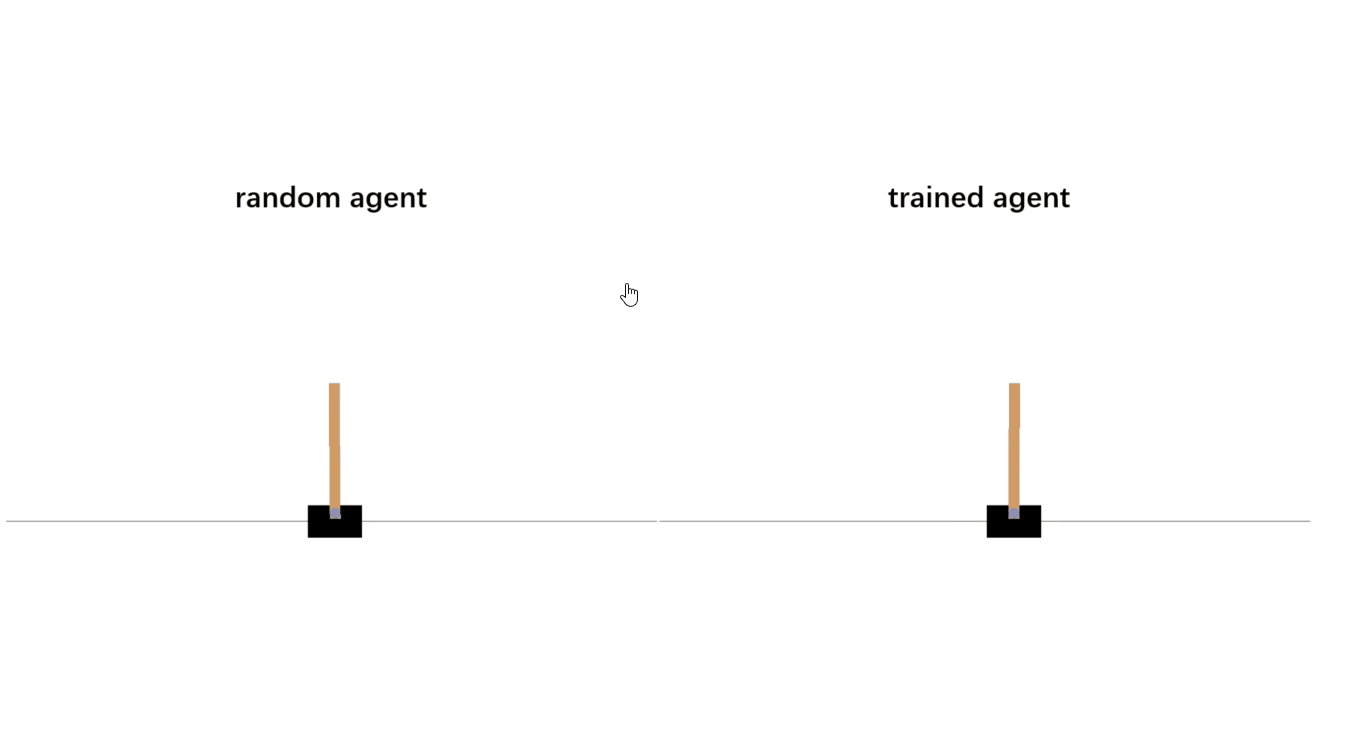


## Using the Configuration File

The DI-engine uses a global configuration file to control all variables of the environment and strategy, each of which has a corresponding default configuration that can be found in cartpole_dqn_config, in the tutorial we use the default configuration directly:

In [6]:
from dizoo.classic_control.cartpole.config.cartpole_dqn_config import main_config, create_config
from ding.config import compile_config

cfg = compile_config(main_config, create_cfg=create_config, auto=True)

/usr/local/lib/python3.10/dist-packages/treevalue/tree/integration/torch.py:21: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  register_for_torch(TreeValue)
/usr/local/lib/python3.10/dist-packages/treevalue/tree/integration/torch.py:22: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  register_for_torch(FastTreeValue)


## Initialize the Environments

In reinforcement learning, there may be a difference in the strategy for collecting environment data between the training process and the evaluation process, for example, the training process tends to train one epoch for n steps of collection, while the evaluation process requires completing the whole game to get a score. We recommend that the collection and evaluation environments be initialized separately as follows.

In [7]:
import gym
from ding.envs import DingEnvWrapper, BaseEnvManagerV2

collector_env = BaseEnvManagerV2(
    env_fn=[lambda: DingEnvWrapper(gym.make("CartPole-v0")) for _ in range(cfg.env.collector_env_num)],
    cfg=cfg.env.manager
)
evaluator_env = BaseEnvManagerV2(
    env_fn=[lambda: DingEnvWrapper(gym.make("CartPole-v0")) for _ in range(cfg.env.evaluator_env_num)],
    cfg=cfg.env.manager
)

/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


>### *Note:*
>
>DingEnvWrapper is a unified wrapper of DI-engine for different environment libraries. BaseEnvManagerV2 is a unified external interface for managing multiple environments. so you can use BaseEnvManagerV2 to collect multiple environments in parallel.

## Select Policy

DI-engine covers most of the reinforcement learning policies, using them only requires selecting the right policy and model. Since DQN is off-policy, we also need to instantiate a buffer module.

In [8]:
from ding.model import DQN
from ding.policy import DQNPolicy
from ding.data import DequeBuffer

model = DQN(**cfg.policy.model)
buffer_ = DequeBuffer(size=cfg.policy.other.replay_buffer.replay_buffer_size)
policy = DQNPolicy(cfg.policy, model=model)

## Build the Pipeline

With the various middleware provided by DI-engine, we can easily build the entire pipeline:

In [11]:
import logging
logging.getLogger().setLevel(logging.INFO)

from ding.framework import task
from ding.framework.context import OnlineRLContext
from ding.framework.middleware import OffPolicyLearner, StepCollector, interaction_evaluator, data_pusher, eps_greedy_handler, CkptSaver

save_dir="./"

with task.start(async_mode=False, ctx=OnlineRLContext()):
    # Evaluating, we place it on the first place to get the score of the random model as a benchmark value
    task.use(interaction_evaluator(cfg, policy.eval_mode, evaluator_env))
    task.use(eps_greedy_handler(cfg))  # Decay probability of explore-exploit
    task.use(StepCollector(cfg, policy.collect_mode, collector_env))  # Collect environmental data
    task.use(data_pusher(cfg, buffer_))  # Push data to buffer
    task.use(OffPolicyLearner(cfg, policy.learn_mode, buffer_))  # Train the model
    task.use(CkptSaver(policy, save_dir, train_freq=100))  # Save the model
    # In the evaluation process, if the model is found to have exceeded the convergence value, it will end early here
    task.run()

INFO:root:Env Space Information:
INFO:root:	Observation Space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
INFO:root:	Action Space: Discrete(2)
INFO:root:	Reward Space: Box(-inf, inf, (1,), float32)
/usr/local/lib/python3.10/dist-packages/gym/envs/registration.py:593: UserWarning: WARN: The environment CartPole-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
/usr/local/lib/python3.10/dist-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step